## Data Exploration

### Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../data/city_lifestyle_dataset.csv')
df.rename(columns = {'country':'region'}, inplace = True)
df.head()

,city_name,region,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [3]:
df.shape

(300, 10)

In [4]:
# Check row granularity

df.city_name.nunique()

300

In [5]:
# Check for missing values
df.isnull().sum()

city_name                 0
region                    0
population_density        0
avg_income                0
internet_penetration      0
avg_rent                  0
air_quality_index         0
public_transport_score    0
happiness_score           0
green_space_ratio         0
dtype: int64

In [6]:
# check datatypes
df.dtypes

city_name                  object
region                     object
population_density          int64
avg_income                  int64
internet_penetration      float64
avg_rent                    int64
air_quality_index           int64
public_transport_score    float64
happiness_score           float64
green_space_ratio         float64
dtype: object

In [7]:
# feature selection
data = df.drop(columns=['city_name', 'region'])
data.head()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [8]:
data.describe()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3944.843333,2827.200000,74.305333,1002.766667,71.246667,55.717333,6.644000,33.993333
std,2982.566777,1201.163939,17.014492,456.282066,25.344961,14.712549,1.685864,9.434067
min,100.000000,480.000000,34.000000,170.000000,22.000000,15.000000,2.500000,2.000000
25%,1830.000000,1907.500000,64.400000,640.000000,54.000000,46.075000,5.300000,28.225000
50%,3083.500000,2810.000000,75.000000,990.000000,67.500000,54.700000,6.900000,34.700000
75%,4823.750000,3752.500000,87.225000,1332.500000,86.000000,64.200000,8.500000,40.400000
max,14427.000000,5720.000000,100.000000,2430.000000,146.000000,95.000000,8.500000,58.000000


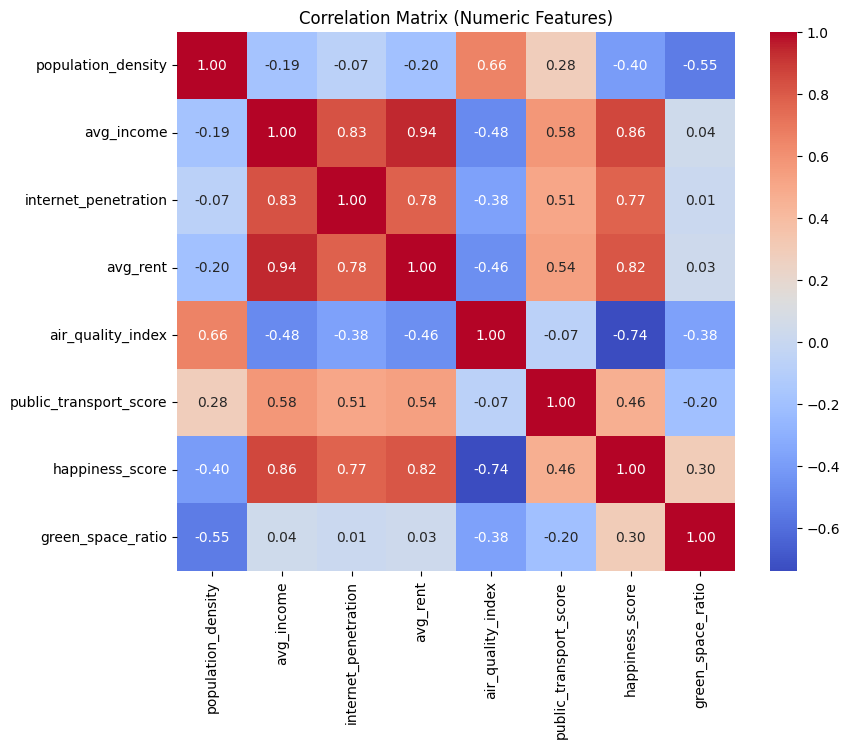

In [9]:
num_cols = data.select_dtypes(include=[np.number]).columns
corr = data[num_cols].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [10]:
data

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,3496,4320,100.0,1510,64,93.7,8.5,42.5
...,...,...,...,...,...,...,...,...
295,1004,4620,100.0,1500,40,64.2,8.5,50.2
296,1652,4500,100.0,1650,44,49.3,8.5,37.4
297,836,3910,98.7,1340,40,55.7,8.5,38.6
298,758,3490,91.2,1390,36,54.1,8.5,44.6


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled = pd.DataFrame(X_scaled, columns=data.columns)

In [12]:
X_scaled.head()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,-0.392882,0.852930,0.712033,0.674466,-1.116351,-0.253086,1.102759,-1.082287
1,-0.028158,0.727843,0.223398,0.718372,-1.155872,0.482207,0.865095,-0.094850
2,-0.464417,1.236532,0.341141,0.718372,-1.274437,1.190268,1.102759,0.658999
3,-0.252836,0.953000,0.405900,1.047665,-0.444485,-0.443718,1.102759,1.019997
4,-0.150740,1.244871,1.512687,1.113524,-0.286399,2.585965,1.102759,0.903203


In [13]:
X_scaled.to_csv('../data/scaled_data.csv', index= False)

In [15]:
data= pd.read_csv('../data/scaled_data.csv')
data.head()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,-0.392882,0.852930,0.712033,0.674466,-1.116351,-0.253086,1.102759,-1.082287
1,-0.028158,0.727843,0.223398,0.718372,-1.155872,0.482207,0.865095,-0.094850
2,-0.464417,1.236532,0.341141,0.718372,-1.274437,1.190268,1.102759,0.658999
3,-0.252836,0.953000,0.405900,1.047665,-0.444485,-0.443718,1.102759,1.019997
4,-0.150740,1.244871,1.512687,1.113524,-0.286399,2.585965,1.102759,0.903203
